<a href="https://colab.research.google.com/github/arkajyotimitra/mini_projects/blob/main/attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
d_model = 512
d_q = d_k = d_v = 64

In [8]:
Q = torch.randn(10, 20, d_model) # batch size, seq_length, dimension of each token
K = torch.randn(10, 20, d_model)
V = torch.randn(10, 20, d_model)

In [9]:
linear_q = nn.Linear(d_model, d_q)
linear_k = nn.Linear(d_model, d_k)
linear_v = nn.Linear(d_model, d_v)

In [10]:
Q = linear_q(Q)   # this transforms the dimensions of the query from the model's dimension to query dimension
K = linear_k(K)
V = linear_v(V)

In [12]:
scores = torch.matmul(Q, K.transpose(-2,-1)) / (d_q ** 0.5)

In [13]:
attn_weights = F.softmax(scores, dim=-1) # gives the distribution over all the weights

In [17]:
output = torch.matmul(attn_weights, V)

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

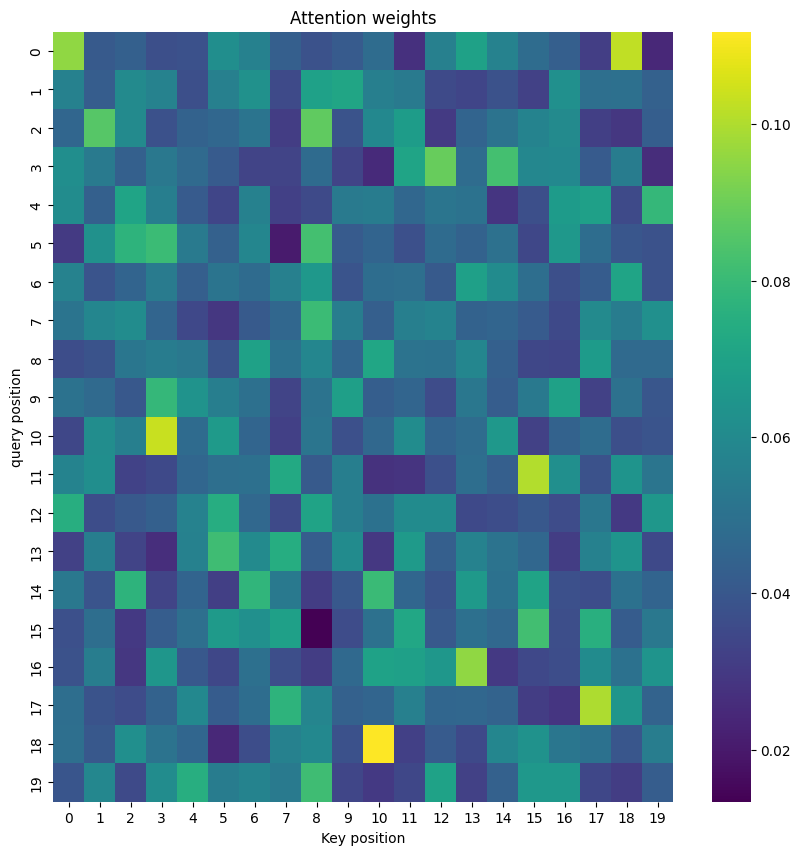

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(attn_weights[0].detach().numpy(), cmap='viridis')
plt.xlabel('Key position')
plt.ylabel('query position')
plt.title('Attention weights')
plt.show()

In [21]:
output.shape

torch.Size([10, 20, 64])